IR (Imbalanced Ratio)

$$ {#(다수) \over #(소수)} = 100 $$

In [1]:
import time
start_time = time.time()

# 자료 생성

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_blobs

In [4]:
X, y = make_classification(n_samples=100, # 샘플 수
                           n_features=2, # 전체 입력 수
                           n_informative=2, # 타겟과 상관 있는 입력 수
                           n_redundant=0, # 타겟과 상관 없는 입력 수
                           n_classes=2, # 타겟 수준 수
                           n_clusters_per_class=1, # 타겟 수준별 군집수(기본값=2)
                           weights=(0.95, 0.05), # 수준 비율: p(0)=0.9, p(1)=0.1
                           class_sep=2, # 타겟 수준 분리 수준. 값이 클수록 구분이
                           random_state=1111)

X, y = make_blobs(n_samples=[2000, 200],
                  centers=[[0.0, 0.0], [3, 3]],
                  cluster_std=[1.5, 1.5],
                  random_state=1111,
                  shuffle=False)

np.unique(y, return_counts=True)

(array([0, 1]), array([2000,  200]))

## 자료 탐색

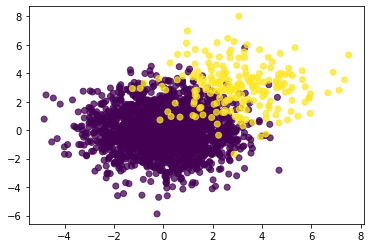

In [5]:
# 시각화 1: np.array + matplotlib
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=y, alpha=0.75)

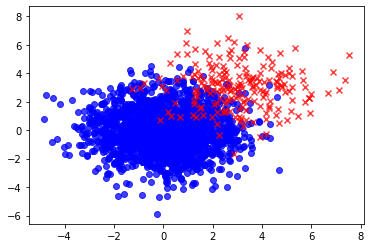

In [6]:
mrk = np.where(y==0, 'o', 'x')
col = np.where(y==0, 'blue', 'red')
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], marker=mrk[i], c=col[i], alpha=0.75)

In [7]:
DF = pd.concat([pd.DataFrame(X), pd.Series(y)], axis=1)
DF.columns = ['x1', 'x2', 'y']
DF.head()

,x1,x2,y
0,-1.950015,-1.609484,0
1,1.185299,-1.317398,0
2,2.252733,-0.035894,0
3,0.413923,-1.449590,0
4,-2.370472,-0.305512,0


In [8]:
from sklearn.model_selection import train_test_split
TRX, TSX, TRy, TSy = train_test_split(DF.drop('y', axis=1), DF['y'], train_size=1500,
                                      stratify=DF['y'], random_state=1111)

In [9]:
k, nk = np.unique(TRy, return_counts=True)
nk / len(TRy)

array([0.90933333, 0.09066667])

In [10]:
k, nk = np.unique(TSy, return_counts=True)
nk / len(TSy)

array([0.90857143, 0.09142857])

<AxesSubplot:xlabel='x1', ylabel='x2'>

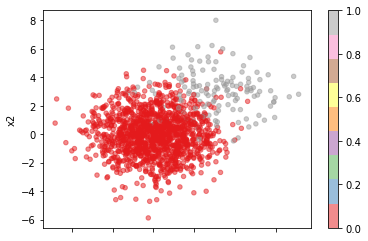

In [11]:
TRX.plot(kind='scatter', x='x1', y='x2', c=TRy, cmap='Set1', alpha=0.5)

In [ ]:
# 시각화 1: np.array + matplotlib

## 이진분류 성능지표

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, cohen_kappa_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
from imblearn.metrics import classification_report_imbalanced

In [13]:
def metcls2(y, ph, yh, modelname=None):
    tn, fp, fn, tp = confusion_matrix(y, yh).ravel()
    acc = accuracy_score(y, yh)
    balacc = balanced_accuracy_score(y, yh)
    kap = cohen_kappa_score(y, yh)
    f1 = f1_score(y, yh) # 2 x (prec x rec)/(prec+rec) = harmonic avg(prec, rec)
    gmean = geometric_mean_score(y, yh)

    rec = recall_score(y, yh)
    prec = precision_score(y, yh)
    spec = tn/(tn+fp)
    iba = (1+0.1*(rec-spec))*rec*spec # alpha=0.1일때 index of balanced accuracy

    rocauc = roc_auc_score(y, ph)
    avgprec = average_precision_score(y, ph)

    metrics = {
        'acc':acc, 'kappa':kap, 'f1':f1, 'gmean':gmean, 'iba':iba, 'balacc':balacc,'prec':prec, 'rec':rec, 'spec':spec,
        'rocauc':rocauc, 'avgprec':avgprec,
        'tn[0,0]':tn, 'fp[0,1]':fp,
        'fn[1,0]':fn, 'tp[1,1]':tp }

    if modelname != None:
        return pd.DataFrame(metrics, index=[modelname])
    return metrics

## Base model

In [14]:
from sklearn.linear_model import LogisticRegression

Eglm = LogisticRegression()
Eglm.fit(TRX, TRy)
Eglm.score(TRX, TRy), Eglm.coef_, Eglm.intercept_

(0.968, array([[1.24618341, 1.26317993]]), array([-5.9098853]))

In [ ]:
COEF = pd.DataFrame((np.c_[Eglm.intercept_,

]))